# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




###Data Visualisation

In [ ]:
#import the libraries

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd,numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the dataset and check the first five rows
inp0 =pd.read_csv('/content/drive/MyDrive/googleplaystore_v2.csv')


In [ ]:
#Check the shape of the dataframe
inp0.shape
inp0.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column


In [ ]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [ ]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [ ]:
#Drop the rows having null values in the Rating field

inp1=inp0[~inp0.Rating.isnull()]
#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [ ]:
# Check the number of nulls in the Rating field again to cross-verify


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values

inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [ ]:
#Inspect the nulls in the Android Version columnIN
inp1[inp1['Android Ver'].isnull()]
inp1[(inp1['Android Ver'].isnull() & (inp1.Category=='1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Drop the row having shifted values
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1.Category=='1.9'))]
#Check the nulls againin Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [ ]:
#Check the most common value in the Android version column
print(inp1['Android Ver'].mode()[0])
len(inp1[inp1['Android Ver']=='4.1 and up'])

4.1 and up


2059

In [ ]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver']=inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])


In [ ]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [ ]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [ ]:
#Check the most common value in the Current version column
inp1['Current Ver'].mode()[0]

'Varies with device'

In [ ]:
#Replace the nulls in the Current version column with the above value
print(inp1['Current Ver'].value_counts())
inp1['Current Ver']=inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64


In [ ]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

#### Handling Incorrect Data Types

In [ ]:
#Check the datatypes of all the columns
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up"
inp1['Price'].head()


0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [ ]:
#Analyse the Price column to check the issue
inp1['Price'].value_counts()


0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [ ]:
#Write the function to make the changes

"""
def pri(val):
  if val==0:
    return int(0)
  else:
    return int(val.split("$")[1])
"""

inp1.Price=inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

In [ ]:
#Verify the dtype of Price once again
inp1['Price'].dtypes

dtype('float64')

In [ ]:
#Analyse the Reviews column
inp1['Reviews']= inp1.Reviews.astype("int32")

In [ ]:
#Change the dtype of this column
inp1.dtypes

#Check the quantitative spread of this dataframe



App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#Analyse the Installs Column
#inp1['Installs'].info()
"""
def do(x):
  return int(x.replace("+","").replace(",",""))
print(do("12,678,788+"))
"""
inp1.Installs=inp1.Installs.apply(lambda x:int(x.replace("+","").replace(",","")))
inp1.Installs.dtypes


dtype('int64')

In [ ]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [ ]:
#Perform the sanity checks on the Reviews column
inp1.info()
inp1.Rating.value_counts()
inp1=inp1[(inp1['Reviews'] <= inp1['Installs'])]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 987.8+ KB


In [ ]:
#perform the sanity checks on prices of free apps
inp1[~(inp1.Type=="Free") & (inp1.Price == 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [ ]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline


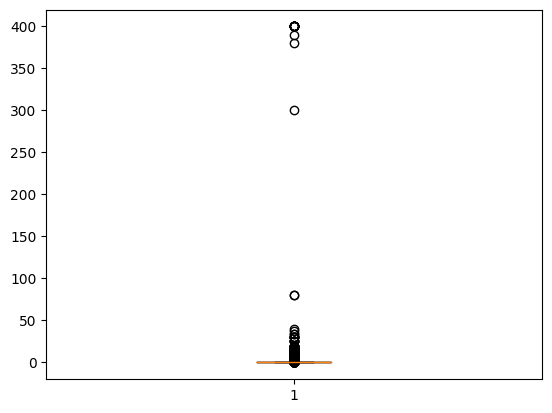

In [ ]:
#Create a box plot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [ ]:
#Check the apps with price more than 200
inp1[inp1.Price > 200]
inp1.shape

(9359, 13)

In [ ]:
#Clean the Price column
inp1=inp1[(inp1.Price) < 200]
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,9344.000000,9.344000e+03,9344.000000,9.344000e+03,9344.000000
mean,4.191695,5.152581e+05,22732.932449,1.793956e+07,0.334463
std,0.515004,3.147643e+06,21316.475007,9.134144e+07,2.169925
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.880000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.998500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.222650e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,79.990000


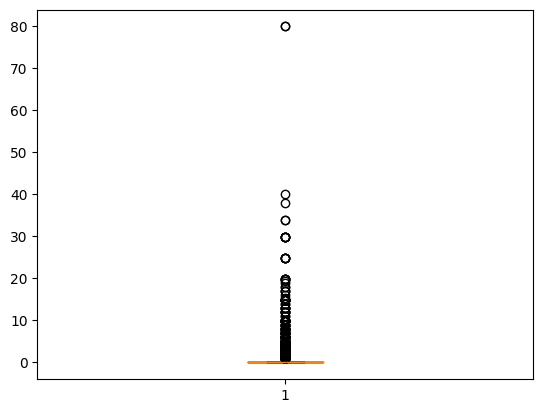

In [ ]:
#Create a box plot for paid apps
plt.boxplot(inp1.Price)
plt.show()


In [ ]:
#Check the apps with price more than 30
inp1=inp1[inp1.Price<30]

In [ ]:
#Clean the Price column again
inp1.shape

(9338, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

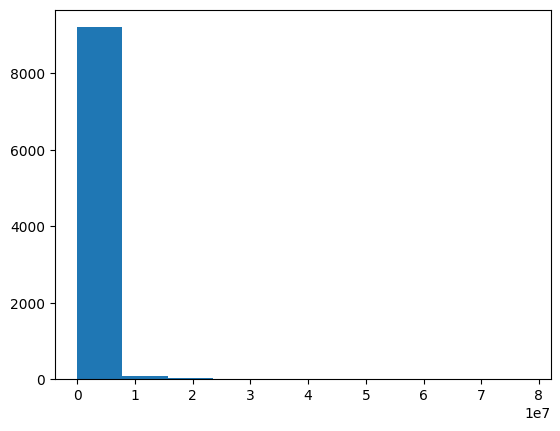

In [ ]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)
plt.show()

In [ ]:
#Create a boxplot of the Reviews column



In [ ]:
#Check records with 1 million reviews
inp1=inp1[inp1.Reviews < 1000000]

In [ ]:
#Drop the above records
inp1.shape


(8634, 13)

(array([7168.,  521.,  314.,  169.,  127.,  114.,   69.,   49.,   55.,
          48.]),
 array([1.000000e+00, 9.950110e+04, 1.990012e+05, 2.985013e+05,
        3.980014e+05, 4.975015e+05, 5.970016e+05, 6.965017e+05,
        7.960018e+05, 8.955019e+05, 9.950020e+05]),
 <BarContainer object of 10 artists>)

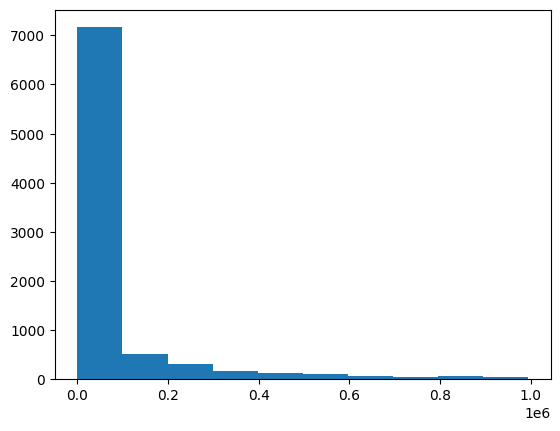

In [ ]:
#Question - Create a histogram again and check the peaks

plt.hist(inp1.Reviews)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec16e2dc730>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec16e2dcc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec16e2dc490>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec16e2dd1b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec16e2dd450>],
 'means': []}

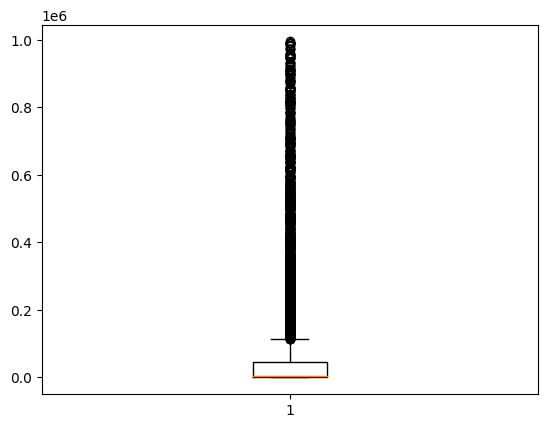

In [ ]:
#Question - Create a box plot for the Installs column and report back the IQR

plt.boxplot(inp1.Reviews)


In [ ]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs

In [ ]:
#Plot a histogram for Size as well.


In [ ]:
#Question - Create a boxplot for the Size column and report back the median value

###Data Visualisation with Seaborn

In [ ]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#### Distribution Plots

![Distplot](images\Distplot.png)

<Axes: xlabel='Rating', ylabel='Density'>

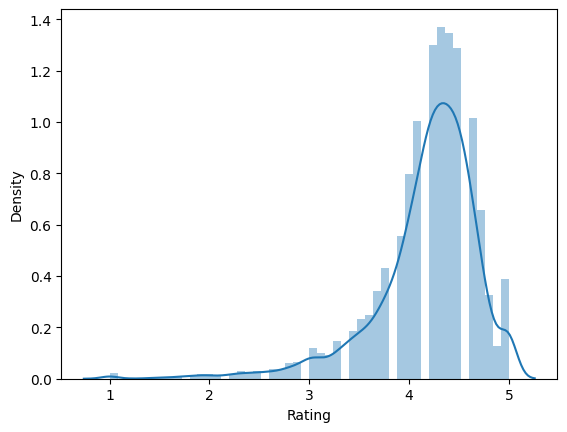

In [ ]:
#Create a distribution plot for rating
sns.distplot(inp1.Rating)

<Axes: xlabel='Rating', ylabel='Density'>

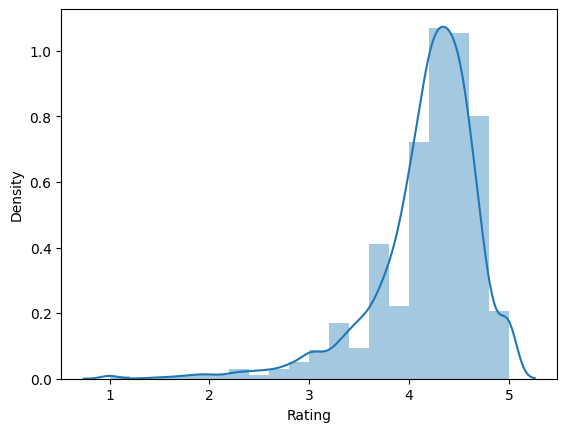

In [ ]:
#Change the number of bins
sns.distplot(inp1.Rating, bins=20)


<Axes: xlabel='Rating', ylabel='Density'>

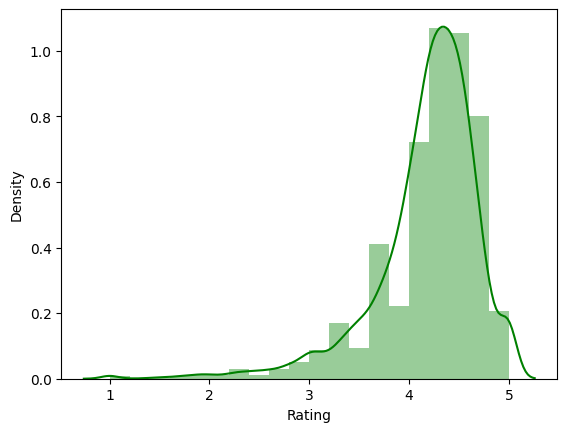

In [ ]:
#Change the colour of bins to green
sns.distplot(inp1.Rating, bins=20,color="g")

Text(0.5, 1.0, 'timepss')

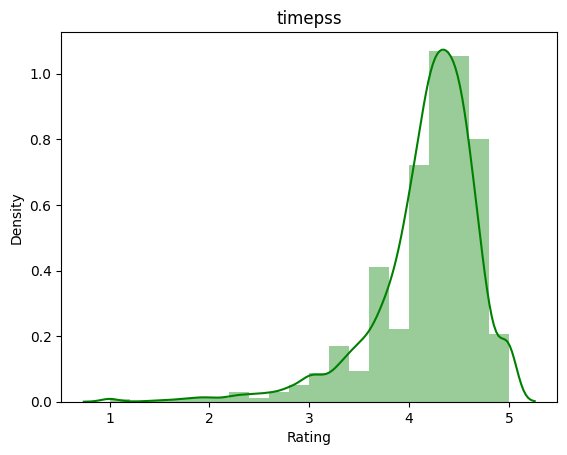

In [ ]:
#Apply matplotlib functionalities

sns.distplot(inp1.Rating, bins=20,color="g")
plt.title("timepss")

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

![PieChart](images\pie.png)

![barChart](images\bar.png)

In [ ]:
#Analyse the Content Rating col
inp1['Content Rating'].value_counts()

NameError: ignored

In [ ]:
#Remove the rows with values which are less represented
inp1[inp1['Content Rating']].isin(["Adults only 18+","Unrated"])

In [ ]:
#Reset the index
inp1.reset_index(inplace=True, drop=True)


In [ ]:
#Check the apps belonging to different categories of Content Rating
inp1['Content Rating'].value_counts()

In [ ]:
#Plot a pie chart

inp1['Content Rating'].value_counts().plot.pie()

In [ ]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.bar()

In [ ]:
#Question - Plot a bar plot for checking the 4th highest Android version type


#### Scatter Plots

In [ ]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size,inp1.Rating)

In [ ]:
### Plot the same thing now using a jointplot
sns.jointploy(inp1.Size,inp1.Rating)

In [ ]:
## Plot a jointplot for Price and Rating
sns.jointploy(inp1.Price,inp1.Rating)

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view

In [ ]:
##Plot a reg plot for Price and Rating and observe the trend

sns.jointploy(inp1.Price,inp1.Rating,kind="reg")

In [ ]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot("Price","Rating",data=inp1[inp1.Price>0],kind="reg")
plt.show()


**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
##Ratings vs Size vs Content Rating
pd.qcut()
##Prepare buckets for the Size column using pd.qcut
inp1['Size_Bucket']= pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],['vl','l','m','h','vh'])


Object `pd.qcut()` not found.


In [ ]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp1, index='Content Rating', columns='Size Bucket', values='Rating')

In [ ]:
##Change the aggregation to median
pd.pivot_table(data=inp1, index='Content Rating', columns='Size Bucket', values='Rating', aggfunc=np.median)

In [ ]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1, index='Content Rating', columns='Size Bucket', values='Rating', aggfunc=lambda x: np.quantie(x,0.2))

In [ ]:
##Store the pivot table in a separate variable
res= pd.pivot_table(data=inp1, index='Content Rating', columns='Size Bucket', values='Rating', aggfunc=lambda x: np.quantie(x,0.2))

In [ ]:
##Plot a heat map
sns.heatmap(res)

In [ ]:
##Apply customisations
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

In [ ]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating


###  Additional Visualisations

#### Line Plots

In [ ]:
## Extract the month from the Last Updated Date
pd.to_datetime(inp1['Last Updated']).dt.month
inp1['updated_month']=pd.to_datetime(inp1['Last Updated']).dt.month

In [ ]:
## Find the average Rating across all the months
inp1.groupby(['updated_month'])['Rating'].mean()


In [ ]:
## Plot a line graph

inp1.groupby(['updated_month'])['Rating'].mean().plot()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [ ]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1,values='Installs',index="updated_month",columns='Content Rating',aggfunc=sum)

In [ ]:
##Store the table in a separate variable
monthly=pd.pivot_table(data=inp1,values='Installs',index="updated_month",columns='Content Rating',aggfunc=sum)

In [1]:
##Plot the stacked bar chart.
monthly.plot(kind="bar",stacked="True", figsize=[10,6])

NameError: ignored